In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

In [2]:
dphi="dphi0"
offset=9
Nbar=np.loadtxt(f"{dphi}_no_sa/Nbar.csv")
rho0=32*Nbar[offset:]
kappa=30/32
poly_flippable=np.loadtxt(f"{dphi}_no_sa/flippable_polymers.csv")
rhoc=rho0*(1/8)**2
#rhoc=32*Nbar[offset:]/(40*40)
n_param=len(Nbar)
n_sim=int(len(poly_flippable)/n_param)
poly_flippable=poly_flippable.reshape(n_param,n_sim).mean(axis=1)[offset:]
with h5py.File(f"{dphi}_no_sa/coord.h5", 'r+') as f:
    umb_field=np.array(f["umbrella_field"])
n_target=len(umb_field[umb_field>0])
print(n_target)
var_phi=1/(rho0*kappa*(1/8)**2) #composition variance in boundary zone for homogeneous system
print(rhoc)


3200
[ 50.  55.  60.  65.  70.  75.  80.  85.  90.  95. 100. 105. 110. 115.
 120. 125. 130. 135. 140. 145. 150.]


[ 50.  55.  60.  65.  70.  75.  80.  85.  90.  95. 100. 105. 110. 115.
 120. 125. 130. 135. 140. 145. 150.]
[0.05890568 0.0532885  0.04828053 0.04388539 0.04045405 0.03691471
 0.034414   0.03183649 0.02968197 0.02776968 0.02585466 0.02445445
 0.02293717 0.02167277 0.02065321 0.01955935 0.01851707 0.01765719
 0.01695578 0.01612015 0.01548388]


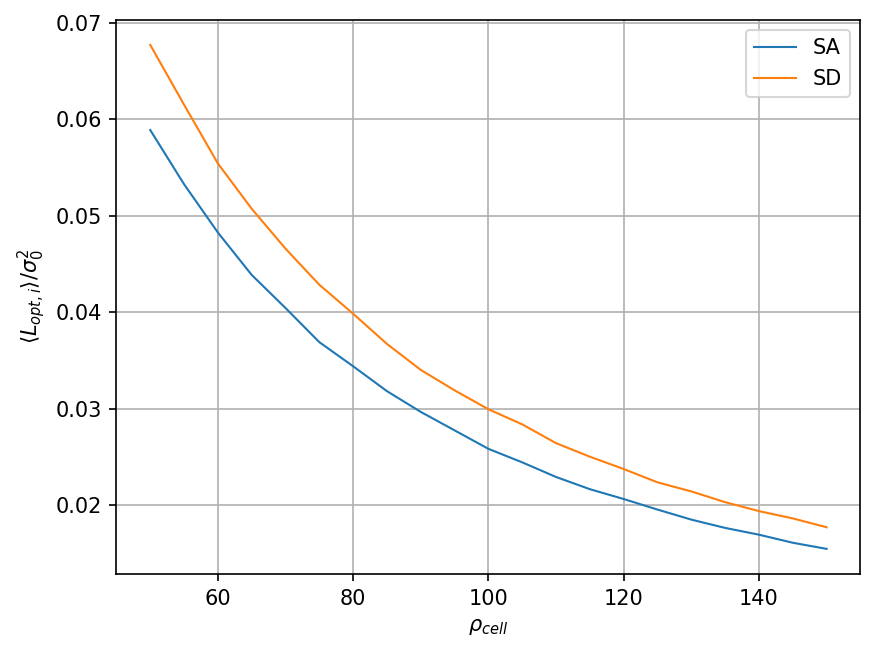

In [3]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\rho_{cell}$")
plt.ylabel(r"$\langle L_{opt,i}\rangle/\sigma^2_0$")
directory_sa=dphi+"_sa"
directory_no_sa=dphi+"_no_sa"
#number of different parameters
opt_sa=np.loadtxt(f"{directory_sa}/opt.csv")/n_target
flips_sa=np.loadtxt(f"{directory_sa}/flips.csv")
#number of simulations per parameter
n_sim=int(len(opt_sa)/n_param)
opt_no_sa=np.loadtxt(f"{directory_no_sa}/opt.csv")/n_target
flips_no_sa=np.loadtxt(f"{directory_no_sa}/flips.csv")
#reshape arrays
opt_sa=opt_sa.reshape(n_param,n_sim).mean(axis=1)[offset:]
opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)[offset:]
flips_sa=flips_sa.reshape(n_param,n_sim).mean(axis=1)[offset:]
flips_no_sa=flips_no_sa.reshape(n_param,n_sim).mean(axis=1)[offset:]
plt.plot(rhoc,opt_sa/var_phi,label="SA",lw=1)
plt.plot(rhoc,opt_no_sa/var_phi,label="SD",lw=1)
plt.legend()
plt.savefig(f"opt_var_rhoc_{dphi}.pdf")
print(rhoc)
print(opt_sa/var_phi)

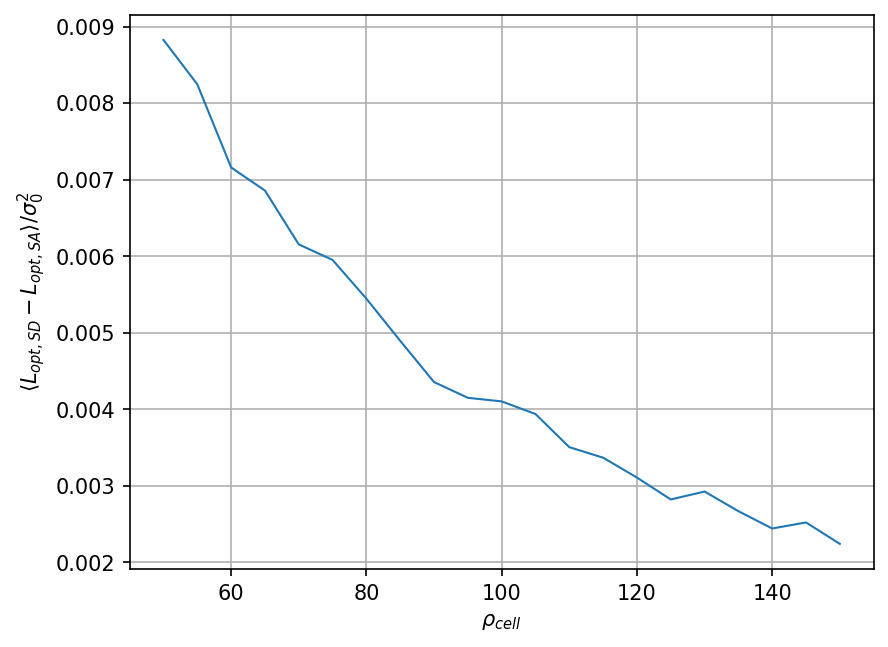

In [94]:
plt.figure(dpi=150)
plt.grid()
plt.xlabel(r"$\rho_{cell}$")
plt.ylabel(r"$\langle L_{opt,SD}-L_{opt,SA}\rangle/\sigma^2_0$")
plt.plot(rhoc,(opt_no_sa-opt_sa)/var_phi,lw=1)
plt.savefig(f"diff_var_rhoc_{dphi}.pdf")

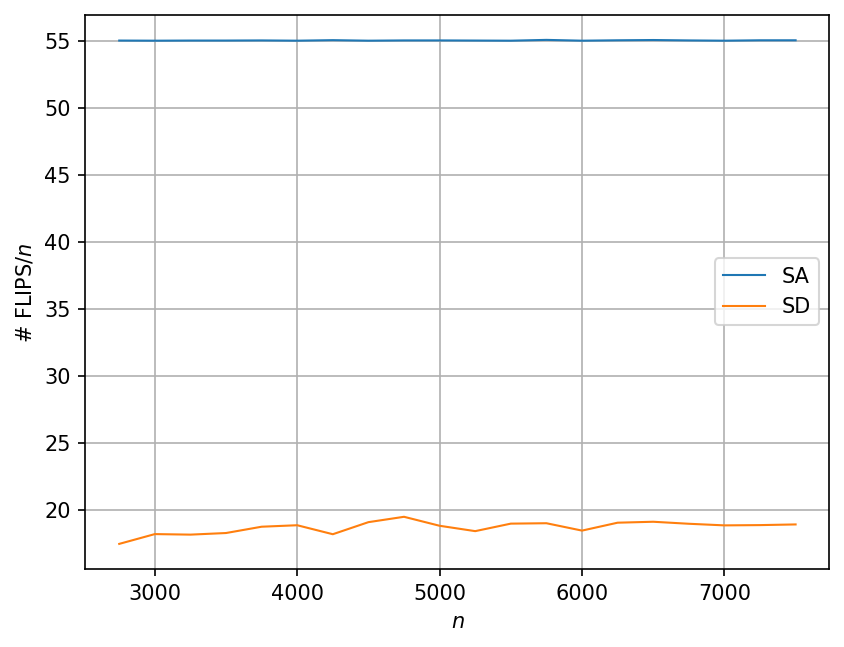

In [90]:
plt.figure(dpi=150)
plt.grid()
plt.ylabel("# FLIPS"+"$/n$")
plt.xlabel("$n$")
plt.plot(poly_flippable,flips_sa/poly_flippable,lw=1,label="SA")
plt.plot(poly_flippable,flips_no_sa/poly_flippable,lw=1,label="SD")
plt.legend()
plt.savefig(f"flips_var_rhoc_{dphi}.pdf")